# Data wrangling WeRateDogs Twitter data

## Introduction

In this project I wrangle tweet data from the @dog_rates #WeRateDogs dog rating twitter account and some other data sources, and do some basic analyses.

## Gather

In [42]:
import pandas as pd
import numpy as np
import tweepy
import json
import time
import warnings
import requests

warnings.filterwarnings('ignore')

In [43]:
# Import twitter flat file data
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [44]:
# Import predictions from url
tsv_request = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
tsv_file = open('image-predictions.tsv', 'w')
tsv_file.write(tsv_request.text)
tsv_file.close()
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [45]:
# Import enhanced twitter data from api into text file of json objects
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''
# Set ids
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
# Create twitter api object
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=3, retry_delay=5,
#                 retry_errors=set([401, 404, 500, 503]))

# Import tweets from twitter api
#start = time.time()
#for index, tweet_archive in twitter.iterrows():
#    try:
#        print(tweet_archive['tweet_id'])
#        tweet = api.get_status(tweet_archive['tweet_id'], tweet_mode='extended')
        # Write tweet json to file
#        with open('tweet_json.txt', 'a') as outfile:  
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#    except Exception as e:
#        print(e)
# Print out run time
#end = time.time()
#print(end - start)

In [46]:
# Read twitter api data from saved text file into dataframe
twitter_api = pd.DataFrame()
with open('tweet_json.txt') as tweetsfile:
    for tweetJson in tweetsfile:
        jData = json.loads(tweetJson)
        twitter_api = twitter_api.append({'tweet_id': jData['id'], 'retweet_count': jData['retweet_count'], 'favorite_count': jData['favorite_count']}, ignore_index=True)
twitter_api = twitter_api[['tweet_id', 'retweet_count', 'favorite_count']]

## Assess

In [47]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [48]:
# Lets check for duplicate tweets
twitter[twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [49]:
# What the the types of values for the numerator?
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Ok some extreme values there!

What kind of values are there for the denominator?

In [50]:
# Check values for denominator
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [51]:
# Check most extreme values for rating_denominator and show more of text
unusual_denominators = twitter[(twitter.rating_denominator > 10)]
with pd.option_context('display.max_colwidth', 200):
    print (unusual_denominators[['text','rating_denominator']])

                                                                                                                                                    text  \
342                                                                                                             @docmisterio account started on 11/15/15   
433                                                  The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
784         RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                       Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068        After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                           Say hello to this unbelievably we

Ok some extreme values for the denominator! For all kinds of reasons, even the good reasons make comparison more difficult. We know tho that really the typical denominator should be 10, so we could look to only dealing with values that have this to make comparison easier for 'typical' dogs.

In [52]:
# What values are given for name?
twitter.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
an             7
Bailey         7
Toby           7
Buddy          7
Bella          6
Jack           6
Leo            6
Scout          6
Dave           6
Koda           6
Oscar          6
Rusty          6
Jax            6
Milo           6
Stanley        6
Chester        5
            ... 
Anthony        1
Rolf           1
Sunshine       1
Strider        1
Lorelei        1
Duddles        1
Gunner         1
Tedrick        1
Lenox          1
Monkey         1
Genevieve      1
Boots          1
Chesney        1
Taz            1
Huck           1
Severus        1
Laela          1
Zoe            1
Griswold       1
Mairi          1
Augie          1
Rumpole        1
Sundance       1
Todo           1
Rooney         1
Oddie          1
Ralph          1
Carter        

In [53]:
# To get a feelm how many doggos are there?
twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

Ok on my visual assessment I noticed an example of dogs being assigned more than one stage! Lets confirm that

In [54]:
# Check example of multiple dog stages
twitter[(twitter.tweet_id == 855851453814013952)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


We may want to remove these 'multiple stage' examples as they could then give us better stats.

In [55]:
# What is the structure of the main twitter table as imported?
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [56]:
# Lets look at some summary stats for the numeric variables of the twitter table
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [57]:
# Lets look at some values for the predictions table
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [58]:
predictions[predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [59]:
predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [60]:
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [61]:
predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
malinois                           20
Samoyed                            20
toy_terrier                        20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [62]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [63]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [64]:
twitter_api

,tweet_id,retweet_count,favorite_count
0,8.924206e+17,8407.0,38295.0
1,8.921774e+17,6197.0,32824.0
2,8.918152e+17,4100.0,24723.0
3,8.916896e+17,8535.0,41640.0
4,8.913276e+17,9253.0,39808.0
5,8.910880e+17,3077.0,19984.0
6,8.909719e+17,2041.0,11704.0
7,8.907292e+17,18641.0,64655.0
8,8.906092e+17,4215.0,27478.0
9,8.902403e+17,7298.0,31528.0


In [65]:
twitter_api.isnull().any().any()

False

In [66]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null float64
retweet_count     2341 non-null float64
favorite_count    2341 non-null float64
dtypes: float64(3)
memory usage: 54.9 KB


In [67]:
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.341000e+03,2341.000000,2341.000000
mean,7.422089e+17,2961.563434,8018.527979
std,6.833609e+16,4972.318833,12382.510326
min,6.660209e+17,0.000000,0.000000
25%,6.783411e+17,595.000000,1390.000000
50%,7.186133e+17,1383.000000,3495.000000
75%,7.986979e+17,3452.000000,9835.000000
max,8.924206e+17,84389.000000,165068.000000


#### Quality
##### `twitter` table
- **Incorrect values for rating_numerator (e.g. 420)**
- **Decimal values used for rating_numerator (e.g. 9.75)**
- **Incorrect values for rating_denominator (e.g. 75 instead of 9.75)**
- **Incorrect values for name (e.g. a, an, such)**
- Source has entire html, better as just text e.g. 'Twitter for iPhone'
- Source could be better as a category data type
- **Timestamp & retweeted_status_timestamp: better as date/time field**
- **Dog stage columns: dogs classified with multiple stages**
- **181 tweets are retweets (we only want tweets of original ratings)**
- **Only 2297 tweets have images ie expanded_urls (we only want tweets with images)**

##### `predictions` table
- Mixed cases for animals names in p1, p2, p3
- Missing 2075 records instead of 2356 records in the twitter table
- **p1, p2, p3 better as category field**

##### `twitter_api` table
- Missing 2341 records instead of 2356 records in the twitter table

#### Tidiness
- **Dog stage columns (doggo, floofer, pupper, puppo) in twitter table should be values in one column ie 'stage'**
- **twitter, predictions & twitter_api should be one table**

9 Quality issues and 2 tidiness issues (highlighted in bold) will be cleaned in this project i.e. 11 issues.

> #### *Special note* ####

> The previous reviewer queried if these two issues were actually the same:

> - Quality: Dog stage columns: dogs classified with multiple stages
> - Tidiness: Dog stage columns (doggo, floofer, pupper, puppo) in twitter table should be values in one column ie  'stage'

> I would argue these are indeed two separate issues. The first issue is a quality issue i.e. certain dogs are tagged with multiple stages, for example:

In [68]:
# Check example of multiple dog stages
twitter[(twitter.tweet_id == 855851453814013952)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


> In this example we can see this tweet/dog has been tagged with multiple dog 'stages' i.e. doggo & puppo. This duplicate categorisation will reduce the quality of further analyses, so a choice was made to omit these 'multiple stage' dogs on the assumption that really all dogs should be tagged with one category only.

> The second issue is structural: we have separate columns for each stage, when really these should be one 'stage' column. Certainly, merging these all into one column rests on the assumption that all dogs/tweets only have one stage! Therefore, it is essential this is the case before this can happen. 

> Hence while these two operations are related, I would still argue these are two separate issues of kind, and actually resulted in two different kinds of cleaning operations later.

> In any case - if the current reviewer also believes these are one issue - I have completed an extra cleaning task to satisfy the requirements of 8 quality issues and 2 tidiness issues!

## Clean

In [69]:
# Copy dataframes to make cleaning versions
twitter_clean = twitter.copy()
predictions_clean = predictions.copy()
twitter_api_clean = twitter_api.copy()

#### 1. 181 tweets are retweets
##### Define
Remove retweet tweets from twitter_clean table
#### Code

In [70]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]

#### Test

In [71]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### 2. Not all tweets have images ie expanded_urls
##### Define
Remove all tweets from twitter_clean table that have no values for expanded_urls
#### Code

In [72]:
twitter_clean = twitter_clean[twitter_clean['expanded_urls'].notnull()]

#### Test

In [73]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

#### 3. twitter, predictions & twitter_api should be one table
##### Define
Merge columns from twitter_api & predictions into twitter_clean table
#### Code

In [74]:
twitter_clean = pd.merge(twitter_clean, twitter_api_clean,
                            on=['tweet_id'], how='left')
twitter_clean = pd.merge(twitter_clean, predictions_clean,
                            on=['tweet_id'], how='left')

##### Test

In [75]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [76]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 30 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
retweet_count                 1383 no

#### 4. Dog stage columns: dogs classified with multiple stages in twitter_clean table
##### Define
Remove rows where dogs tagged with multiple stages from twitter_clean table
#### Code

In [77]:
# Replace name values for stage columns with integer value of 1
twitter_clean['doggo'].replace("doggo", "1", inplace=True)
twitter_clean['doggo'].replace("None", "0", inplace=True)
twitter_clean['floofer'].replace("floofer", "1", inplace=True)
twitter_clean['floofer'].replace("None", "0", inplace=True)
twitter_clean['pupper'].replace("pupper", "1", inplace=True)
twitter_clean['pupper'].replace("None", "0", inplace=True)
twitter_clean['puppo'].replace("puppo", "1", inplace=True)
twitter_clean['puppo'].replace("None", "0", inplace=True)
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [78]:
# Convert stage columns to int type
twitter_clean.doggo = twitter_clean.doggo.astype(int)
twitter_clean.floofer = twitter_clean.floofer.astype(int)
twitter_clean.pupper = twitter_clean.pupper.astype(int)
twitter_clean.puppo = twitter_clean.puppo.astype(int)

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 30 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null int64
floofer                       2117 non-null int64
pupper                        2117 non-null int64
puppo                         2117 non-null int64
retweet_count                 1383 non-nu

In [79]:
# Create new column for total stages
twitter_clean['total_stages'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo
twitter_clean['total_stages'].describe()

count    2117.000000
mean        0.165328
std         0.386526
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: total_stages, dtype: float64

In [80]:
twitter_clean[(twitter_clean.total_stages == 2)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 156 to 901
Data columns (total 31 columns):
tweet_id                      12 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     12 non-null object
source                        12 non-null object
text                          12 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 12 non-null object
rating_numerator              12 non-null int64
rating_denominator            12 non-null int64
name                          12 non-null object
doggo                         12 non-null int64
floofer                       12 non-null int64
pupper                        12 non-null int64
puppo                         12 non-null int64
retweet_count                 8 non-null float64
favorite_count     

In [81]:
# Remove all rows that have more that one dog stage set
twitter_clean = twitter_clean[(twitter_clean.total_stages < 2)]

#### Test

In [82]:
twitter_clean['total_stages'].describe()

count    2105.000000
mean        0.154869
std         0.361866
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: total_stages, dtype: float64

#### 5. Dog stage columns (doggo, floofer, pupper, puppo) in twitter table should be values in one column ie 'stage'
##### Define
From dog stage columns create new stage column in twitter_clean table 
#### Code

In [83]:
# Create new column for 'stage' & set default
twitter_clean['stage'] = 'no_stage'
# Overide stage value if particular stage set
twitter_clean.loc[twitter_clean['doggo'] == 1, 'stage'] = 'doggo'
twitter_clean.loc[(twitter_clean['floofer'] == 1), 'stage'] = 'floofer'
twitter_clean.loc[(twitter_clean['pupper'] == 1), 'stage'] = 'pupper'
twitter_clean.loc[(twitter_clean['puppo'] == 1), 'stage'] = 'puppo'
# Convert to category type
twitter_clean.stage = twitter_clean.stage.astype('category')

#### Test

In [84]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_stages,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,0,no_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0,no_stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0,no_stage
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0,no_stage
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0,no_stage
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0,no_stage
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,0,no_stage
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,0,no_stage
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,0,no_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1,doggo


In [85]:
twitter_clean.stage.value_counts()

no_stage    1779
pupper       222
doggo         72
puppo         23
floofer        9
Name: stage, dtype: int64

In [86]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2116
Data columns (total 32 columns):
tweet_id                      2105 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2105 non-null object
source                        2105 non-null object
text                          2105 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2105 non-null object
rating_numerator              2105 non-null int64
rating_denominator            2105 non-null int64
name                          2105 non-null object
doggo                         2105 non-null int64
floofer                       2105 non-null int64
pupper                        2105 non-null int64
puppo                         2105 non-null int64
retweet_count                 1375 non-nu

#### 6. Timestamp & retweeted_status_timestamp: better as date/time field
##### Define
In twitter_clean table convert timestamp and retweeted_status_timestamp to datetime field
#### Code

In [87]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
twitter_clean.retweeted_status_timestamp = pd.to_datetime(twitter_clean.retweeted_status_timestamp)

#### Test

In [88]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2116
Data columns (total 32 columns):
tweet_id                      2105 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2105 non-null datetime64[ns]
source                        2105 non-null object
text                          2105 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2105 non-null object
rating_numerator              2105 non-null int64
rating_denominator            2105 non-null int64
name                          2105 non-null object
doggo                         2105 non-null int64
floofer                       2105 non-null int64
pupper                        2105 non-null int64
puppo                         2105 non-null int64
retweet_count            

#### 7. Incorrect values for name (e.g. a, an, such) in twitter_clean table
##### Define
In twitter_clean table for name field replace incorrect values with 'None'
#### Code

In [89]:
twitter_clean.name.replace("a", "None", inplace=True)
twitter_clean.name.replace("an", "None", inplace=True)
twitter_clean.name.replace("the", "None", inplace=True)
twitter_clean.name.replace("infuriating", "None", inplace=True)
twitter_clean.name.replace("such", "None", inplace=True)
twitter_clean.name.replace("quite", "None", inplace=True)

#### Test

In [90]:
twitter_clean.name.value_counts()

None          689
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Bella           6
Jax             6
Koda            6
Oscar           6
Bailey          6
Bo              6
Stanley         6
Dave            5
Leo             5
Louis           5
Rusty           5
Milo            5
Scout           5
Buddy           5
Chester         5
Bentley         5
Finn            4
Brody           4
             ... 
Jeffrie         1
Mollie          1
Pip             1
Rodney          1
JD              1
Butter          1
old             1
Laika           1
Lucia           1
Diogi           1
Lipton          1
Maya            1
Rontu           1
Traviss         1
Anna            1
Ridley          1
Marq            1
Sid             1
Kody            1
Aiden           1
Jackie          1
Bruiser         1
Grizz           1
Kyro            1
Tommy     

#### 8. Incorrect values for rating_denominator (e.g. 0)
##### Define
In twitter_clean table remove rows where denominator not 10
#### Code

In [91]:
twitter_clean = twitter_clean[(twitter_clean.rating_denominator == 10)]

#### Test

In [92]:
twitter_clean.rating_denominator.value_counts()

10    2087
Name: rating_denominator, dtype: int64

#### 9. Decimal values used for rating_numerator (e.g. 9.75)
##### Define
In twitter_clean table convert rating_numerator & rating_denominator to floats
#### Code

In [93]:
# Convert to float type
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype('float')
twitter_clean.rating_denominator = twitter_clean.rating_denominator.astype('float')

#### Test

In [94]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2116
Data columns (total 32 columns):
tweet_id                      2087 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2087 non-null datetime64[ns]
source                        2087 non-null object
text                          2087 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2087 non-null object
rating_numerator              2087 non-null float64
rating_denominator            2087 non-null float64
name                          2087 non-null object
doggo                         2087 non-null int64
floofer                       2087 non-null int64
pupper                        2087 non-null int64
puppo                         2087 non-null int64
retweet_count        

#### 10. Incorrect values for rating_numerator (e.g. 75 instead of 9.75)
##### Define
In twitter_clean table correct values incorrectly set for rating_numerator and remove rows not true ratings of dogs
#### Code

In [95]:
unusual_numerators = twitter_clean[(twitter_clean.rating_numerator > 15.0)]
with pd.option_context('display.max_colwidth', 200):
    print (unusual_numerators[['tweet_id','text','rating_numerator']])

                tweet_id  \
531   786709082849828864   
588   778027034220126208   
772   749981277374128128   
1486  680494726643068929   
1840  670842764863651840   

                                                                                                                                                                   text  \
531                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
588   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
772                                                                                      This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1486                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 htt

In [96]:
# Update incorrectly read decimal rating values
twitter_clean.at[531, 'rating_numerator'] = 9.75
twitter_clean.at[588, 'rating_numerator'] = 11.27
twitter_clean.at[1486, 'rating_numerator'] = 11.26
# Remove most extreme outlier rows where rating_numerator values not true ratings of dogs!
twitter_clean = twitter_clean[twitter_clean.rating_numerator != 1776.0]
twitter_clean = twitter_clean[twitter_clean.rating_numerator != 420.0]

#### Test

In [97]:
unusual_numerators = twitter_clean[(twitter_clean.rating_numerator > 15.0)]
with pd.option_context('display.max_colwidth', 200):
    print (unusual_numerators[['tweet_id','text','rating_numerator']])

Empty DataFrame
Columns: [tweet_id, text, rating_numerator]
Index: []


#### 11. p1, p2, p3 better as category field
##### Define
In twitter_clean table convert columns p1, p2, p3 to category type
#### Code

In [98]:
# Convert to category type
twitter_clean.p1 = twitter_clean.p1.astype('category')
twitter_clean.p2 = twitter_clean.p2.astype('category')
twitter_clean.p3 = twitter_clean.p3.astype('category')

#### Test

In [99]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2116
Data columns (total 32 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         21 non-null float64
in_reply_to_user_id           21 non-null float64
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null float64
rating_denominator            2085 non-null float64
name                          2085 non-null object
doggo                         2085 non-null int64
floofer                       2085 non-null int64
pupper                        2085 non-null int64
puppo                         2085 non-null int64
retweet_count        

## Store

In [100]:
twitter_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Analyse

These analyses and visulisations are based on the wrangled and cleaned data as per the process above.

#### Insight 1: What are the mean & median scores for rating (numerator) ?

In [101]:
twitter_clean.rating_numerator.describe()

count    2085.000000
mean       10.612125
std         2.163874
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

The mean score is 10.61 and the median is 11.00

#### Insight 2: What proportion of dogs are in each 'stage' ?

In [102]:
twitter_clean.stage.value_counts()

no_stage    1759
pupper       222
doggo         72
puppo         23
floofer        9
Name: stage, dtype: int64

While most dogs have no stage assigned, the most popular stage is 'pupper'

#### Insight 3: What are the top 5 dog names?

In [103]:
twitter_clean.name.value_counts()

None          674
Lucy           11
Charlie        11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Sadie           8
Winston         8
Lola            8
Daisy           7
Toby            7
Bailey          6
Jax             6
Bella           6
Stanley         6
Bo              6
Koda            6
Oscar           6
Bentley         5
Louis           5
Buddy           5
Dave            5
Rusty           5
Chester         5
Scout           5
Milo            5
Leo             5
Cassie          4
Jeffrey         4
             ... 
Jamesy          1
Longfellow      1
Sprout          1
Laika           1
Apollo          1
Fido            1
Hazel           1
Evy             1
Keet            1
Brutus          1
Emma            1
Rueben          1
Terrance        1
Rey             1
Brat            1
Gustav          1
Moofasa         1
Julio           1
Ricky           1
Ferg            1
Kirk            1
Glenn           1
Lambeau         1
Callie          1
Link      

While most dogs don't have an identifiable name, the top 5 real dog names are: Lucy, Charlie, Cooper, Oliver & Penny

## Visualize

In my visulisation I will explore the distribution of the main score variable 'rating_numerator'

Text(0.5,1,'Distribution of scores (numerator) for all dogs')

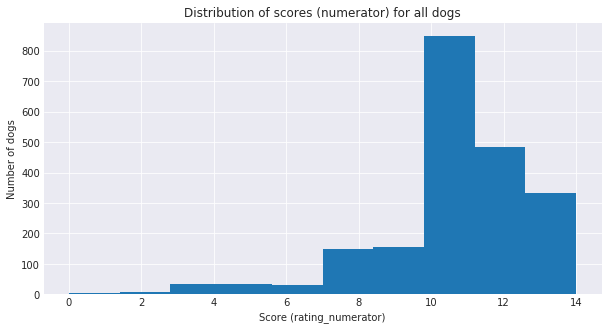

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

ratingsplot = twitter_clean['rating_numerator'].hist(figsize=(10,5))
ratingsplot.set_xlabel("Score (rating_numerator)")
ratingsplot.set_ylabel("Number of dogs")
ratingsplot.set_title("Distribution of scores (numerator) for all dogs")

From the plot we can see that the vast majority of dogs are given scores between 10-14, with the most popular score being 11 (as seen by the previous median value).

Very few dogs get a score lower than 10 - why? (hypothesis: because they are good dogs ;-)